In [49]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('ds_salaries_US.csv')

In [51]:
tabla_contingencia = pd.crosstab(df['company_size'], df['experience_level'])

chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)

tabla_esperada = pd.DataFrame(expected, 
                              index=tabla_contingencia.index, 
                              columns=tabla_contingencia.columns)

print("Tabla de Frecuencias Observadas:")
print(tabla_contingencia)



Tabla de Frecuencias Observadas:
experience_level   EN  EX   MI    SE
company_size                        
L                  41   4   60   158
M                 123  90  423  2087
S                  19   4   14    17


In [52]:
print("\nTabla de Frecuencias Esperadas:")
print(tabla_esperada)


Tabla de Frecuencias Esperadas:
experience_level          EN         EX          MI           SE
company_size                                                    
L                  15.831908   8.478289   42.997039   195.692763
M                 163.917434  87.780921  445.174671  2026.126974
S                   3.250658   1.740789    8.828289    40.180263


In [53]:
n_filas = tabla_contingencia.shape[0]
n_columnas = tabla_contingencia.shape[1]
grados_libertad = (n_filas - 1) * (n_columnas - 1)

print(f"Grados de libertad: {grados_libertad}")

Grados de libertad: 6


In [54]:
print(f"Estadístico de prueba chi-cuadrado usando scipy: {chi2}")

Estadístico de prueba chi-cuadrado usando scipy: 165.20219398903114


In [55]:
print(f"Valor p: {p}")
nivel_significancia = 0.05

if p < nivel_significancia:
    print("Se rechaza la hipótesis nula: Existe una asociación significativa entre el tamaño de la empresa y el nivel de experiencia.")
else:
    print("No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar que existe una asociación significativa entre el tamaño de la empresa y el nivel de experiencia.")

Valor p: 4.680103600016105e-33
Se rechaza la hipótesis nula: Existe una asociación significativa entre el tamaño de la empresa y el nivel de experiencia.


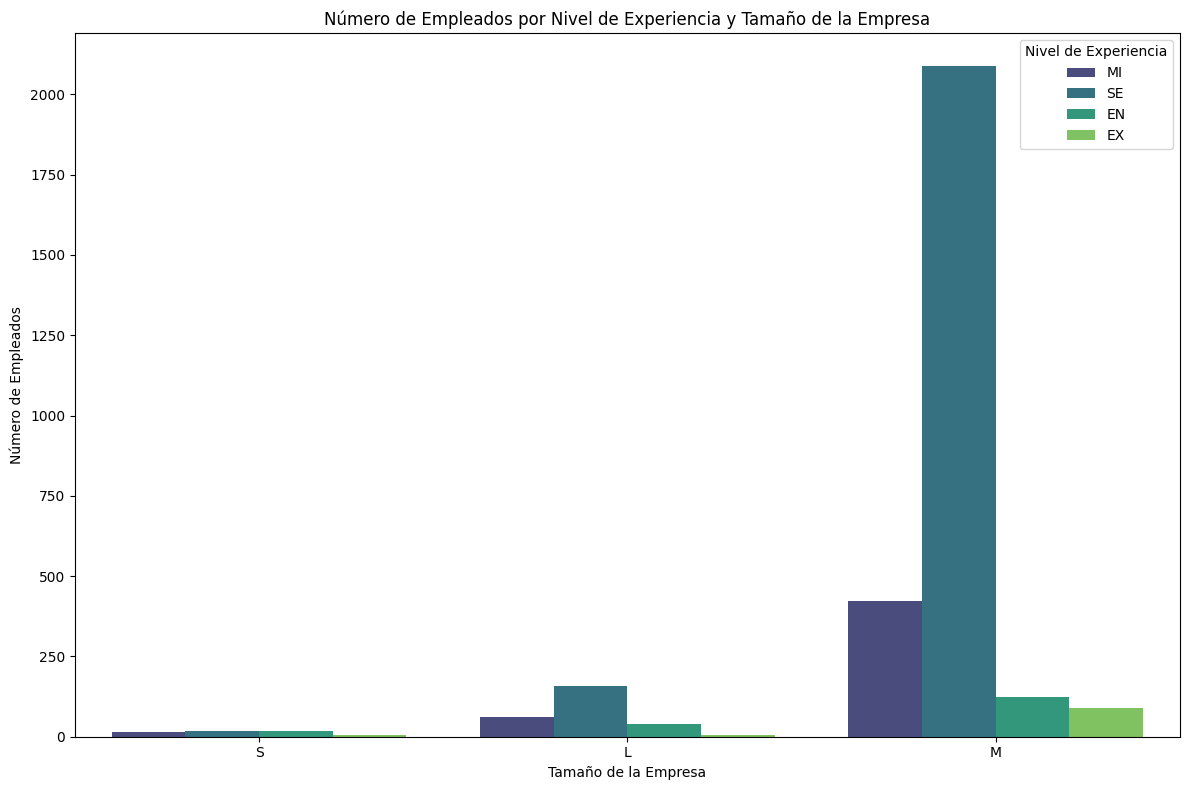

In [56]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='company_size', hue='experience_level', palette='viridis')

plt.xlabel('Tamaño de la Empresa')
plt.ylabel('Número de Empleados')
plt.title('Número de Empleados por Nivel de Experiencia y Tamaño de la Empresa')
plt.legend(title='Nivel de Experiencia')

plt.tight_layout()
plt.show()


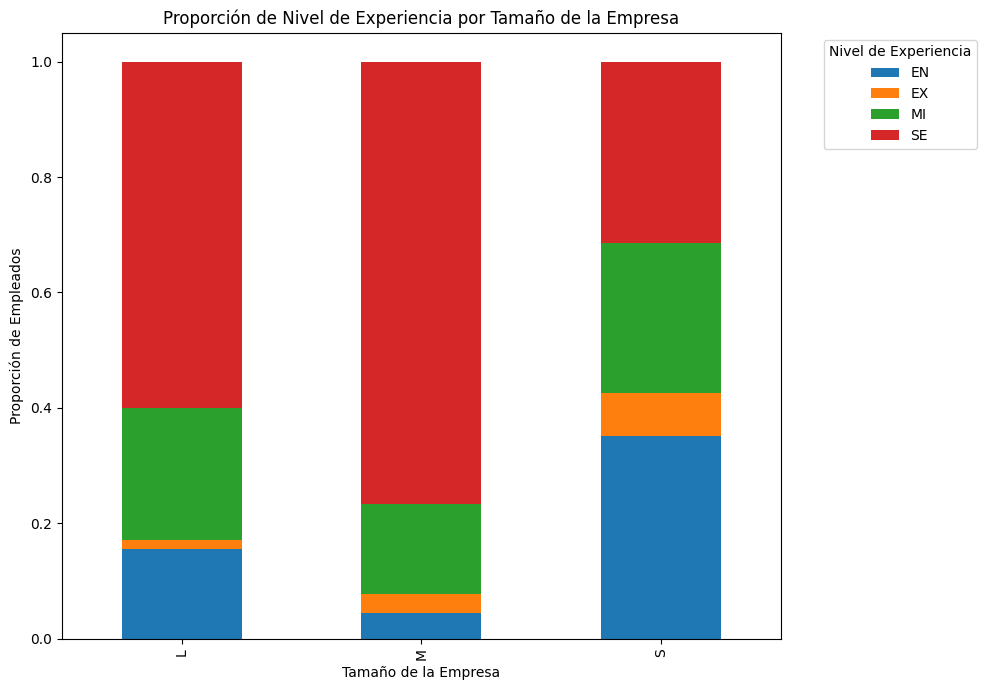

In [57]:
tabla_contingencia.div(tabla_contingencia.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Tamaño de la Empresa')
plt.ylabel('Proporción de Empleados')
plt.title('Proporción de Nivel de Experiencia por Tamaño de la Empresa')
plt.legend(title='Nivel de Experiencia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [58]:
sizeM=df[df['company_size']=='M']
sizeM

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
4,9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M,Data Scientist
5,10,2023,SE,FT,Data Scientist,90700,USD,90700,US,0,US,M,Data Scientist
6,11,2023,SE,FT,Data Analyst,130000,USD,130000,US,100,US,M,Data Analyst
7,12,2023,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M,Data Analyst
10,15,2023,SE,FT,Data Modeler,147100,USD,147100,US,0,US,M,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,3704,2021,SE,FT,Data Engineer,165000,USD,165000,US,0,US,M,Data Engineer
3030,3740,2020,SE,FT,Data Science Manager,190200,USD,190200,US,100,US,M,Data Scientist
3031,3741,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M,Data Scientist
3032,3742,2020,MI,FT,Data Scientist,138350,USD,138350,US,100,US,M,Data Scientist


In [59]:
sizeL=df[df['company_size']=='L']
sizeM=df[df['company_size']=='M']

In [60]:
print('Cantidad de L',sizeL.shape[0])
print('Cantidad de M',sizeM.shape[0])

Cantidad de L 263
Cantidad de M 2723


In [61]:
experience_counts = sizeM['experience_level'].value_counts()
print('Nivel de experiencia de size M')
experience_counts

Nivel de experiencia de size M


experience_level
SE    2087
MI     423
EN     123
EX      90
Name: count, dtype: int64

In [62]:

sizeM=df[df['company_size']=='L']
experience_counts = sizeM['experience_level'].value_counts()
print('Nivel de experiencia de size L')
experience_counts

Nivel de experiencia de size L


experience_level
SE    158
MI     60
EN     41
EX      4
Name: count, dtype: int64

In [67]:
import numpy as np
from scipy.stats import norm

n_L = 263 
x_L_SE = 158 

n_M = 2723  
x_M_SE = 2087  

p1 = x_L_SE / n_L  
p2 = x_M_SE / n_M  

p_combined = (x_L_SE + x_M_SE) / (n_L + n_M)
SE = np.sqrt(p_combined * (1 - p_combined) * (1 / n_L + 1 / n_M))
z_stat = (p1 - p2) / SE
p_value = 1 - norm.cdf(z_stat)  

print(f"Estadístico Z: {z_stat}")
print(f"Valor p: {p_value}")

nivel_significancia = 0.05

if p_value < nivel_significancia:
    # Hipótesis Nula (H0): La proporción en tamaño L es menor o igual a la proporción en tamaño M (p1 <= p2).
    # Hipótesis Alternativa (H1): La proporción en tamaño L es mayor que la proporción en tamaño M (p1 > p2).
    print("Se rechaza la hipótesis nula: La proporción en tamaño L es significativamente mayor que la proporción en tamaño M.")
else:
    # Hipótesis Nula (H0): La proporción en tamaño L es menor o igual a la proporción en tamaño M (p1 <= p2).
    # Hipótesis Alternativa (H1): La proporción en tamaño L es mayor que la proporción en tamaño M (p1 > p2).
    print("No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar que la proporción en tamaño L es mayor que la proporción en tamaño M.")


Estadístico Z: -5.939948664408721
Valor p: 0.9999999985744433
No se rechaza la hipótesis nula: No hay evidencia suficiente para afirmar que la proporción en tamaño L es mayor que la proporción en tamaño M.
